# Proposal - Nhóm 2

### Big Data Applications: Machine Learning at Scale

### Đề tài: Music recommendation system

### GV: Quách Đình Hoàng


### Members:

1. Nguyễn Anh Đắc - 19133020

2. Nguyễn Thanh Tân Kỷ - 19133031

3. Đào Thị Cẩm Tiên - 19133055

4. Lại Hữu Trác - 19133059

### Phần 1: Lý do chọn đề tài

- Mục đích của nhóm khi chọn đề tài tạo ra một hệ thống đề xuất bài hát là để người dùng có thể dễ dàng tiếp cận với các bài hát phù hợp với sở thích của mình.

### Phần 2: Giới thiệu về dataset

- Million Song là một bộ dữ liệu gồm các tính năng và siêu dữ liệu âm thanh được cung cấp miễn phí cho một triệu bản nhạc nổi tiếng đương thời.
- Bộ dữ liệu Million Song bắt đầu là một dự án hợp tác giữa The Echo Nest và LabROSA. Nó được hỗ trợ một phần bởi NSF.
    + Dataset Source: http://labrosa.ee.columbia.edu/millionsong/
    + Paper: http://ismir2011.ismir.net/papers/OS6-1.pdf
- Nhóm sẽ không sử dụng trực tiếp tập dữ liệu này, nhưng nhóm sẽ sử dụng một số phần của nó. 
    + Tập dữ liệu: Million Song - Recommendation Engines (Gồm có "10000.txt" và "song_data.csv")
    + Link dataset: https://www.kaggle.com/code/mgmarques/million-song-recommendation-engines/data 
- Tập dữ liệu về user (10000.txt) có 3 cột và 2000000 dòng chứa số lượt phát của người dùng ẩn danh cho các bài hát có trong tập dữ liệu triệu bài hát
    + user_id: ID của người dùng
    + song_id: ID của bài hát
    + listen_count: Lượt nghe của bài hát
- Tập dữ liệu về bài hát (song_data.csv) có 5 cột và 1000000 dòng chứa các thuộc tính của một triệu bài hát
    + song_id: ID của bài hát
    + title: Tên bài hát
    + release: Tên ablum của bài hát đó (
    + artist_name: Tên nghệ sĩ, ca sĩ
    + year: Năm bài hát được phát hành

### Các mục tiêu về đề tài của nhóm:

1. Các nhạc sĩ đang thịnh hành
2. Hiện thị top các bài hát đang thịnh hành trên hệ thống
3. Tạo một hệ thống đề xuất các bài hát cho người dùng dựa vào số lượng lượt nghe của các bài hát

### Phương pháp và thuật toán sử dụng:
+ Có 2 cách tiếp cận hệ thống gợi ý: Collaborative filtering và Content-Base, nhóm em sẽ thực hiện theo cách tiếp cận Collaborative filtering - xây dựng hệ thống gợi ý dựa trên các ngươi dùng tương đồng.
+ Thuật toán sử dụng:
Alternating least squares


### Tập Dữ Liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

data_song = pd.read_csv("song_data.csv")
data_song.columns

Index(['song_id', 'title', 'release', 'artist_name', 'year'], dtype='object')

In [2]:
# 3 dòng đầu tiên:
data_song.head(3)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006


In [3]:
# 3 dòng cuối:
data_song.tail(3) 

,song_id,title,release,artist_name,year
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0
999999,SOWXJXQ12AB0189F43,Fernweh feat. Sektion Kuchikäschtli,So Oder So,Texta,2004


In [4]:
data_song.shape

(1000000, 5)

In [5]:
data_song.describe()

,year
count,1000000.000000
mean,1030.325652
std,998.745002
min,0.000000
25%,0.000000
50%,1969.000000
75%,2002.000000
max,2011.000000


In [6]:
print(data_song.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB
None


In [7]:

data_user = pd.read_csv('10000.txt', sep='\t', header=None)
data_user.columns = ['user_id', 'song_id', 'listen_count']
data_user.head()


,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [8]:
data_user.shape

(2000000, 3)

<AxesSubplot:>

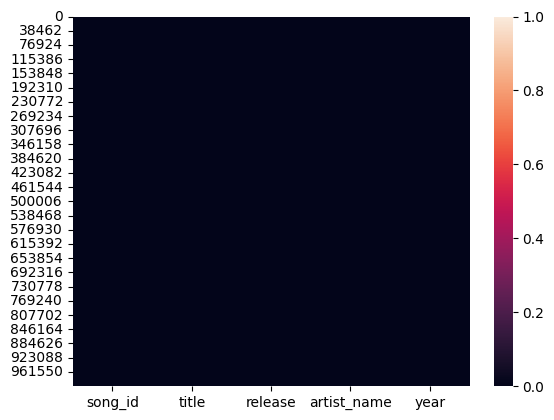

In [9]:
sns.heatmap(pd.isnull(data_song))